## Сначала посмотрим на наш датасет


In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [151]:
students = pd.read_csv('stud_math.xls')

In [152]:
students = pd.read_csv('stud_math.xls')
students.columns = ['school', 'sex', 'age', 'address', 'family_size', 'pstatus', 'medu', 'fedu',
                    'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                    'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                    'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
                    'freetime', 'goout', 'health', 'absences', 'score']

display(students.head(10))
students.info()

,school,sex,age,address,family_size,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   family_size         368 non-null    object 
 5   pstatus             350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

## Как можно увидеть, в датасете 13 числовых столбцов и 17 строковых

Начнем очищать данные. Для начала посмотрим, в каких столбцах есть значение nan. Заменим его на None.

In [153]:
 students.isna().any()

school                False
sex                   False
age                   False
address                True
family_size            True
pstatus                True
medu                   True
fedu                   True
mjob                   True
fjob                   True
reason                 True
guardian               True
traveltime             True
studytime              True
failures               True
schoolsup              True
famsup                 True
paid                   True
activities             True
nursery                True
studytime_granular     True
higher                 True
internet               True
romantic               True
famrel                 True
freetime               True
goout                  True
health                 True
absences               True
score                  True
dtype: bool

Практически в каждом столбце встречается хотя бы одно значение None.

In [154]:
# Заменим значения nan на None
students.where(pd.notnull(students), None).sample(30)
students.fillna({'medu':0,'fedu':0,'traveltime':0,'studytime':0,'failures':0,'studytime_granular':0,'famrel':0,'freetime':0,
               'goout':0,'health':0,'absences':0})


,school,sex,age,address,family_size,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


## Теперь рассмотрим каждый каждый столбец по-отдельности

## school

In [155]:
display(students.school.value_counts())
display(students.school.unique())
students.school.sample(15)

GP    349
MS     46
Name: school, dtype: int64

array(['GP', 'MS'], dtype=object)

114    GP
198    GP
358    MS
213    GP
388    MS
133    GP
80     GP
263    GP
195    GP
314    GP
245    GP
56     GP
341    GP
66     GP
216    GP
Name: school, dtype: object

## sex

In [156]:
display(students.sex.value_counts())
display(students.sex.unique())
students.sex.sample(15)

F    208
M    187
Name: sex, dtype: int64

array(['F', 'M'], dtype=object)

40     F
327    M
131    F
85     F
163    M
186    M
32     M
193    M
235    M
336    F
7      F
364    F
216    F
300    F
191    F
Name: sex, dtype: object

## address

In [157]:
# можем заменить U и R на urban, region
students.address = students.address.apply(lambda x: 'region' if x == 'R' else 'urban')
display(students.address.value_counts())
display(students.address.unique())
students.address.sample(15)

urban     312
region     83
Name: address, dtype: int64

array(['urban', 'region'], dtype=object)

109     urban
288     urban
230     urban
228     urban
301     urban
359     urban
192     urban
333     urban
376     urban
153     urban
99      urban
40      urban
108    region
79      urban
205     urban
Name: address, dtype: object

## age

In [158]:
display(students.age.value_counts())


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Заметим, что большая часть учащихся - это (возможно) школьники 10 класса. Может быть, это пригодится нам далее.

## famsize

In [159]:
students.family_size = students.family_size.apply(lambda x: 'less_than_3' if x == 'LE3' else 'greater_than_3' if x == 'GT3' else None)
display(students.family_size.value_counts())
display(students.family_size.unique())
students.family_size.sample(15)

greater_than_3    261
less_than_3       107
Name: family_size, dtype: int64

array([None, 'greater_than_3', 'less_than_3'], dtype=object)

174       less_than_3
43     greater_than_3
89        less_than_3
344              None
136    greater_than_3
25     greater_than_3
343    greater_than_3
154    greater_than_3
294       less_than_3
292       less_than_3
129              None
172              None
249    greater_than_3
386    greater_than_3
370       less_than_3
Name: family_size, dtype: object

## pstatus

In [160]:
students.pstatus = students.pstatus.apply(lambda x: 'together' if x == 'T' else 'apart' if x == 'A' else None)
display(students.pstatus.value_counts())
display(students.pstatus.unique())
students.pstatus.sample(15)

together    314
apart        36
Name: pstatus, dtype: int64

array(['apart', None, 'together'], dtype=object)

272    together
136    together
112        None
278    together
41     together
66        apart
320       apart
264    together
244    together
292    together
94     together
293    together
394    together
239        None
210        None
Name: pstatus, dtype: object

## medu

In [161]:
display(students.medu.value_counts())
display(students.medu.unique())
students.medu.sample(15)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64

array([ 4.,  1.,  3.,  2., nan,  0.])

61     1.0
77     2.0
286    2.0
173    1.0
354    4.0
260    4.0
265    3.0
79     3.0
196    4.0
83     2.0
98     4.0
70     3.0
310    1.0
239    NaN
334    2.0
Name: medu, dtype: float64

## fedu

In [162]:
display(students.fedu.value_counts())
display(students.fedu.unique())
# Заметим, что здесь опечатка. Исправим 40 на 4.
students.fedu = students.fedu.apply(lambda x: 4.0 if x == 40. else x)
display(students.fedu.value_counts())

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: fedu, dtype: int64

## mjob

In [163]:
display(students.mjob.value_counts())
display(students.mjob.unique())
#Здесь все хорошо

other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

## fjob

In [164]:
display(students.fjob.value_counts())
display(students.fjob.unique())
# Здесь тоже нет никаких проблем

other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

## reason

In [165]:
display(students.reason.value_counts())
display(students.reason.unique())

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

## guardian

In [166]:
display(students.guardian.value_counts())
display(students.guardian.unique())

mother    250
father     86
other      28
Name: guardian, dtype: int64

array(['mother', 'father', 'other', nan], dtype=object)

## traveltime

In [167]:
display(students.traveltime.value_counts())
display(students.traveltime.unique())

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

array([ 2.,  1.,  3., nan,  4.])

## studytime

In [168]:
display(students.studytime.value_counts())
display(students.studytime.unique())

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

array([ 2.,  3.,  1., nan,  4.])

## failures

In [169]:
display(students.failures.value_counts())
display(students.failures.unique())

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

array([ 0.,  3., nan,  2.,  1.])

## schoolsup

In [170]:
display(students.schoolsup.value_counts())
display(students.schoolsup.unique())

no     335
yes     51
Name: schoolsup, dtype: int64

array(['yes', 'no', nan], dtype=object)

## famsup

In [171]:
display(students.famsup.value_counts())
display(students.famsup.unique())

yes    219
no     137
Name: famsup, dtype: int64

array(['no', 'yes', nan], dtype=object)

## paid

In [172]:
display(students.paid.value_counts())
display(students.paid.unique())

no     200
yes    155
Name: paid, dtype: int64

array(['no', nan, 'yes'], dtype=object)

## activities

In [173]:
display(students.activities.value_counts())
display(students.activities.unique())

yes    195
no     186
Name: activities, dtype: int64

array(['no', 'yes', nan], dtype=object)

## nursery

In [174]:
display(students.nursery.value_counts())
display(students.nursery.unique())

yes    300
no      79
Name: nursery, dtype: int64

array(['yes', 'no', nan], dtype=object)

## studytime_granular

In [175]:
display(students.studytime_granular.value_counts())
display(students.studytime_granular.unique())

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64

array([ -6.,  -9.,  -3.,  nan, -12.])

## higher 

In [176]:
display(students.higher.value_counts())
display(students.higher.unique())

yes    356
no      19
Name: higher, dtype: int64

array(['yes', nan, 'no'], dtype=object)

## internet 

In [177]:
display(students.internet.value_counts())
display(students.internet.unique())

yes    305
no      56
Name: internet, dtype: int64

array([nan, 'yes', 'no'], dtype=object)

## romantic

In [178]:
display(students.romantic.value_counts())
display(students.romantic.unique())

no     240
yes    124
Name: romantic, dtype: int64

array(['no', nan, 'yes'], dtype=object)

## famrel 

In [179]:
display(students.famrel.value_counts())
display(students.famrel.unique())
# Видим значение -1, исправим на 1.
students.famrel = students.famrel.apply(lambda x: 1.0 if x == -1.0  else x)
display(students.famrel.unique())

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

array([ 4.,  5.,  3., nan,  1.,  2.])

## freetime

In [180]:
display(students.freetime.value_counts())
display(students.freetime.unique())

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

array([ 3.,  2.,  4.,  1.,  5., nan])

## goout

In [181]:
display(students.goout.value_counts())
display(students.goout.unique())

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

array([ 4.,  3.,  2.,  1.,  5., nan])

##  health

In [182]:
display(students.health.value_counts())
display(students.health.unique())

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

array([ 3.,  5.,  1.,  2.,  4., nan])

## absences

In [183]:
display(students.absences.value_counts())
display(students.absences.unique())

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

## score 

In [184]:
display(students.score.value_counts())
display(students.score.unique())
# Заметим, что только один студент получил 100 баллов. Достаточно большое кол-во учеников получили 0 баллов.
# Удалим строки, где значение score равно 0
students = students[students.score.notnull()]


50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

In [185]:
# Заполним пропуски
students.fillna({'address': 'urban','family_size': 'greater_than_3','pstatus': 'together','mjob': 'other','fjob': 'other',
                 'reason': 'course','guardian': 'mother', 'schoolsup': 'no','famsup': 'yes','paid': 'no',
                 'activities': 'who knows','nursery': 'yes','higher': 'yes', 'internet': 'yes', 'romantic': 'no' })

,school,sex,age,address,family_size,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,urban,greater_than_3,apart,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,urban,greater_than_3,together,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,urban,less_than_3,together,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,urban,greater_than_3,together,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,urban,greater_than_3,together,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,urban,less_than_3,apart,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,urban,less_than_3,together,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,region,greater_than_3,together,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,region,less_than_3,together,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,who knows,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


## Теперь поработаем с числовыми столбцами

## age

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

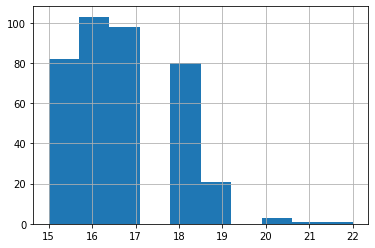

In [186]:
# В данном столбце нет пропущенных значений
students.age.hist()
students.age.describe()

In [187]:
# Видим, что есть выбросы. Попытаемся их устранить
median = students.age.median()
IQR = students.age.quantile(0.75) - students.age.quantile(0.25)
perc25 = students.age.quantile(0.25)
perc75 = students.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


Судя по нашему графику, в выбросы попадает только одно значение - 22 года. Не будем удалять из соображений здравого смысла.

## medu

count    386.000000
mean       2.766839
std        1.094277
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

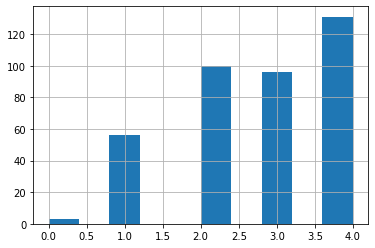

In [188]:
students.medu.hist()
students.medu.describe()

In [189]:
# Судя по всему,выбросов здесь нет. Но проверим данную гипотезу.
median = students.medu.median()
IQR = students.medu.quantile(0.75) - students.medu.quantile(0.25)
perc25 = students.medu.quantile(0.25)
perc75 = students.medu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))



25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


In [ ]:
# Что и требовалось доказать, выбросов нет.

## fedu

count    365.000000
mean       2.528767
std        1.088082
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

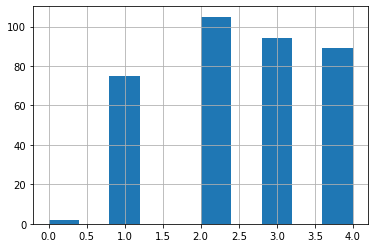

In [190]:
students.fedu.hist()
students.fedu.describe()

In [191]:
median = students.medu.median()
IQR = students.fedu.quantile(0.75) - students.fedu.quantile(0.25)
perc25 = students.fedu.quantile(0.25)
perc75 = students.fedu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


Во-первых, заметим,что в данной гистограмме имеются выбросы (значение 0). Однако, предполагаю, что они не сильно повлияют на общую статистику, поэтому их можно оставаить. К тому же, среди женщин без образования процентность абсолютно такая же.Значит мы можем не фильтровать данный столбец.
Обратим внимание, что процентность женщин с высшим образованием больше, чем процентность мужчин, которые, в основном, заканчивают 9 классов. 

## traveltime	

1.0    239
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64

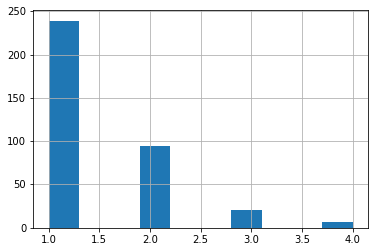

In [192]:
students.traveltime.hist()
students.traveltime.describe()
students.traveltime.value_counts()

В основном, студенты живут недалеко от учебного заведения

In [193]:
median = students.traveltime.median()
IQR = students.traveltime.quantile(0.75) - students.traveltime.quantile(0.25)
perc25 = students.traveltime.quantile(0.25)
perc75 = students.traveltime.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


Видим выброс со значением 4 (7 человек). Скорее всего, в выбросы оно попало из-за маленькой частотности, эти показатели также могут влиять на успеваемость ученика, поэтому пока что не будем их удалять.

## studytime

count    382.000000
mean       2.036649
std        0.847239
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

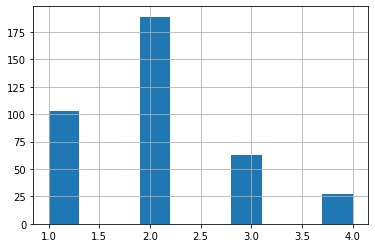

In [195]:
students.studytime.hist()
students.studytime.describe()


In [196]:
median = students.studytime.median()
IQR = students.studytime.quantile(0.75) - students.traveltime.quantile(0.25)
perc25 = students.studytime.quantile(0.25)
perc75 = students.studytime.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


Здесь выбросы также не будем удалять.Наверняка чем больше ученик тратит времени на учебу, тем выше будет оценка за итоговый экзамен.

## famrel

count    362.000000
mean       3.936464
std        0.907858
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

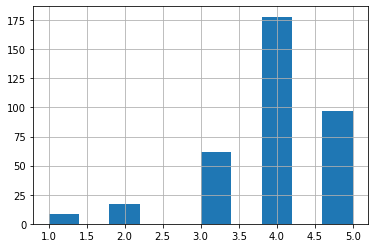

In [197]:
students.famrel.hist()
students.famrel.describe()


In [198]:
median = students.famrel.median()
IQR = students.famrel.quantile(0.75) - students.traveltime.quantile(0.25)
perc25 = students.famrel.quantile(0.25)
perc75 = students.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 4.0,  Границы выбросов: [-2.0, 11.0].


Как видно из графика, у большинства достаточно хорошие отношения в семье.

## freetime

count    380.000000
mean       3.223684
std        0.993364
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

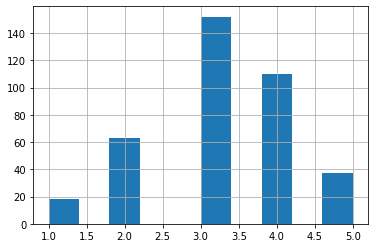

In [199]:
students.freetime.hist()
students.freetime.describe()

In [200]:
median = students.famrel.median()
IQR = students.famrel.quantile(0.75) - students.traveltime.quantile(0.25)
perc25 = students.famrel.quantile(0.25)
perc75 = students.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 4.0,  Границы выбросов: [-2.0, 11.0].


У большинства достаточно свободного свободного времени

## goout

count    382.000000
mean       3.094241
std        1.116104
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

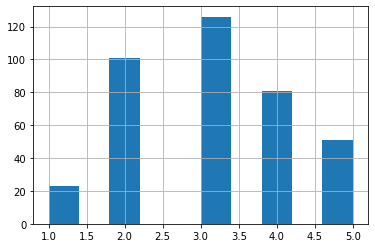

In [201]:
students.goout.hist()
students.goout.describe()

In [202]:
median = students.goout.median()
IQR = students.goout.quantile(0.75) - students.traveltime.quantile(0.25)
perc25 = students.goout.quantile(0.25)
perc75 = students.goout.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 3.0,  Границы выбросов: [-2.5, 8.5].


# Теперь проведем корреляционный анализ

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\numpy\linalg\linalg.py:1974: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


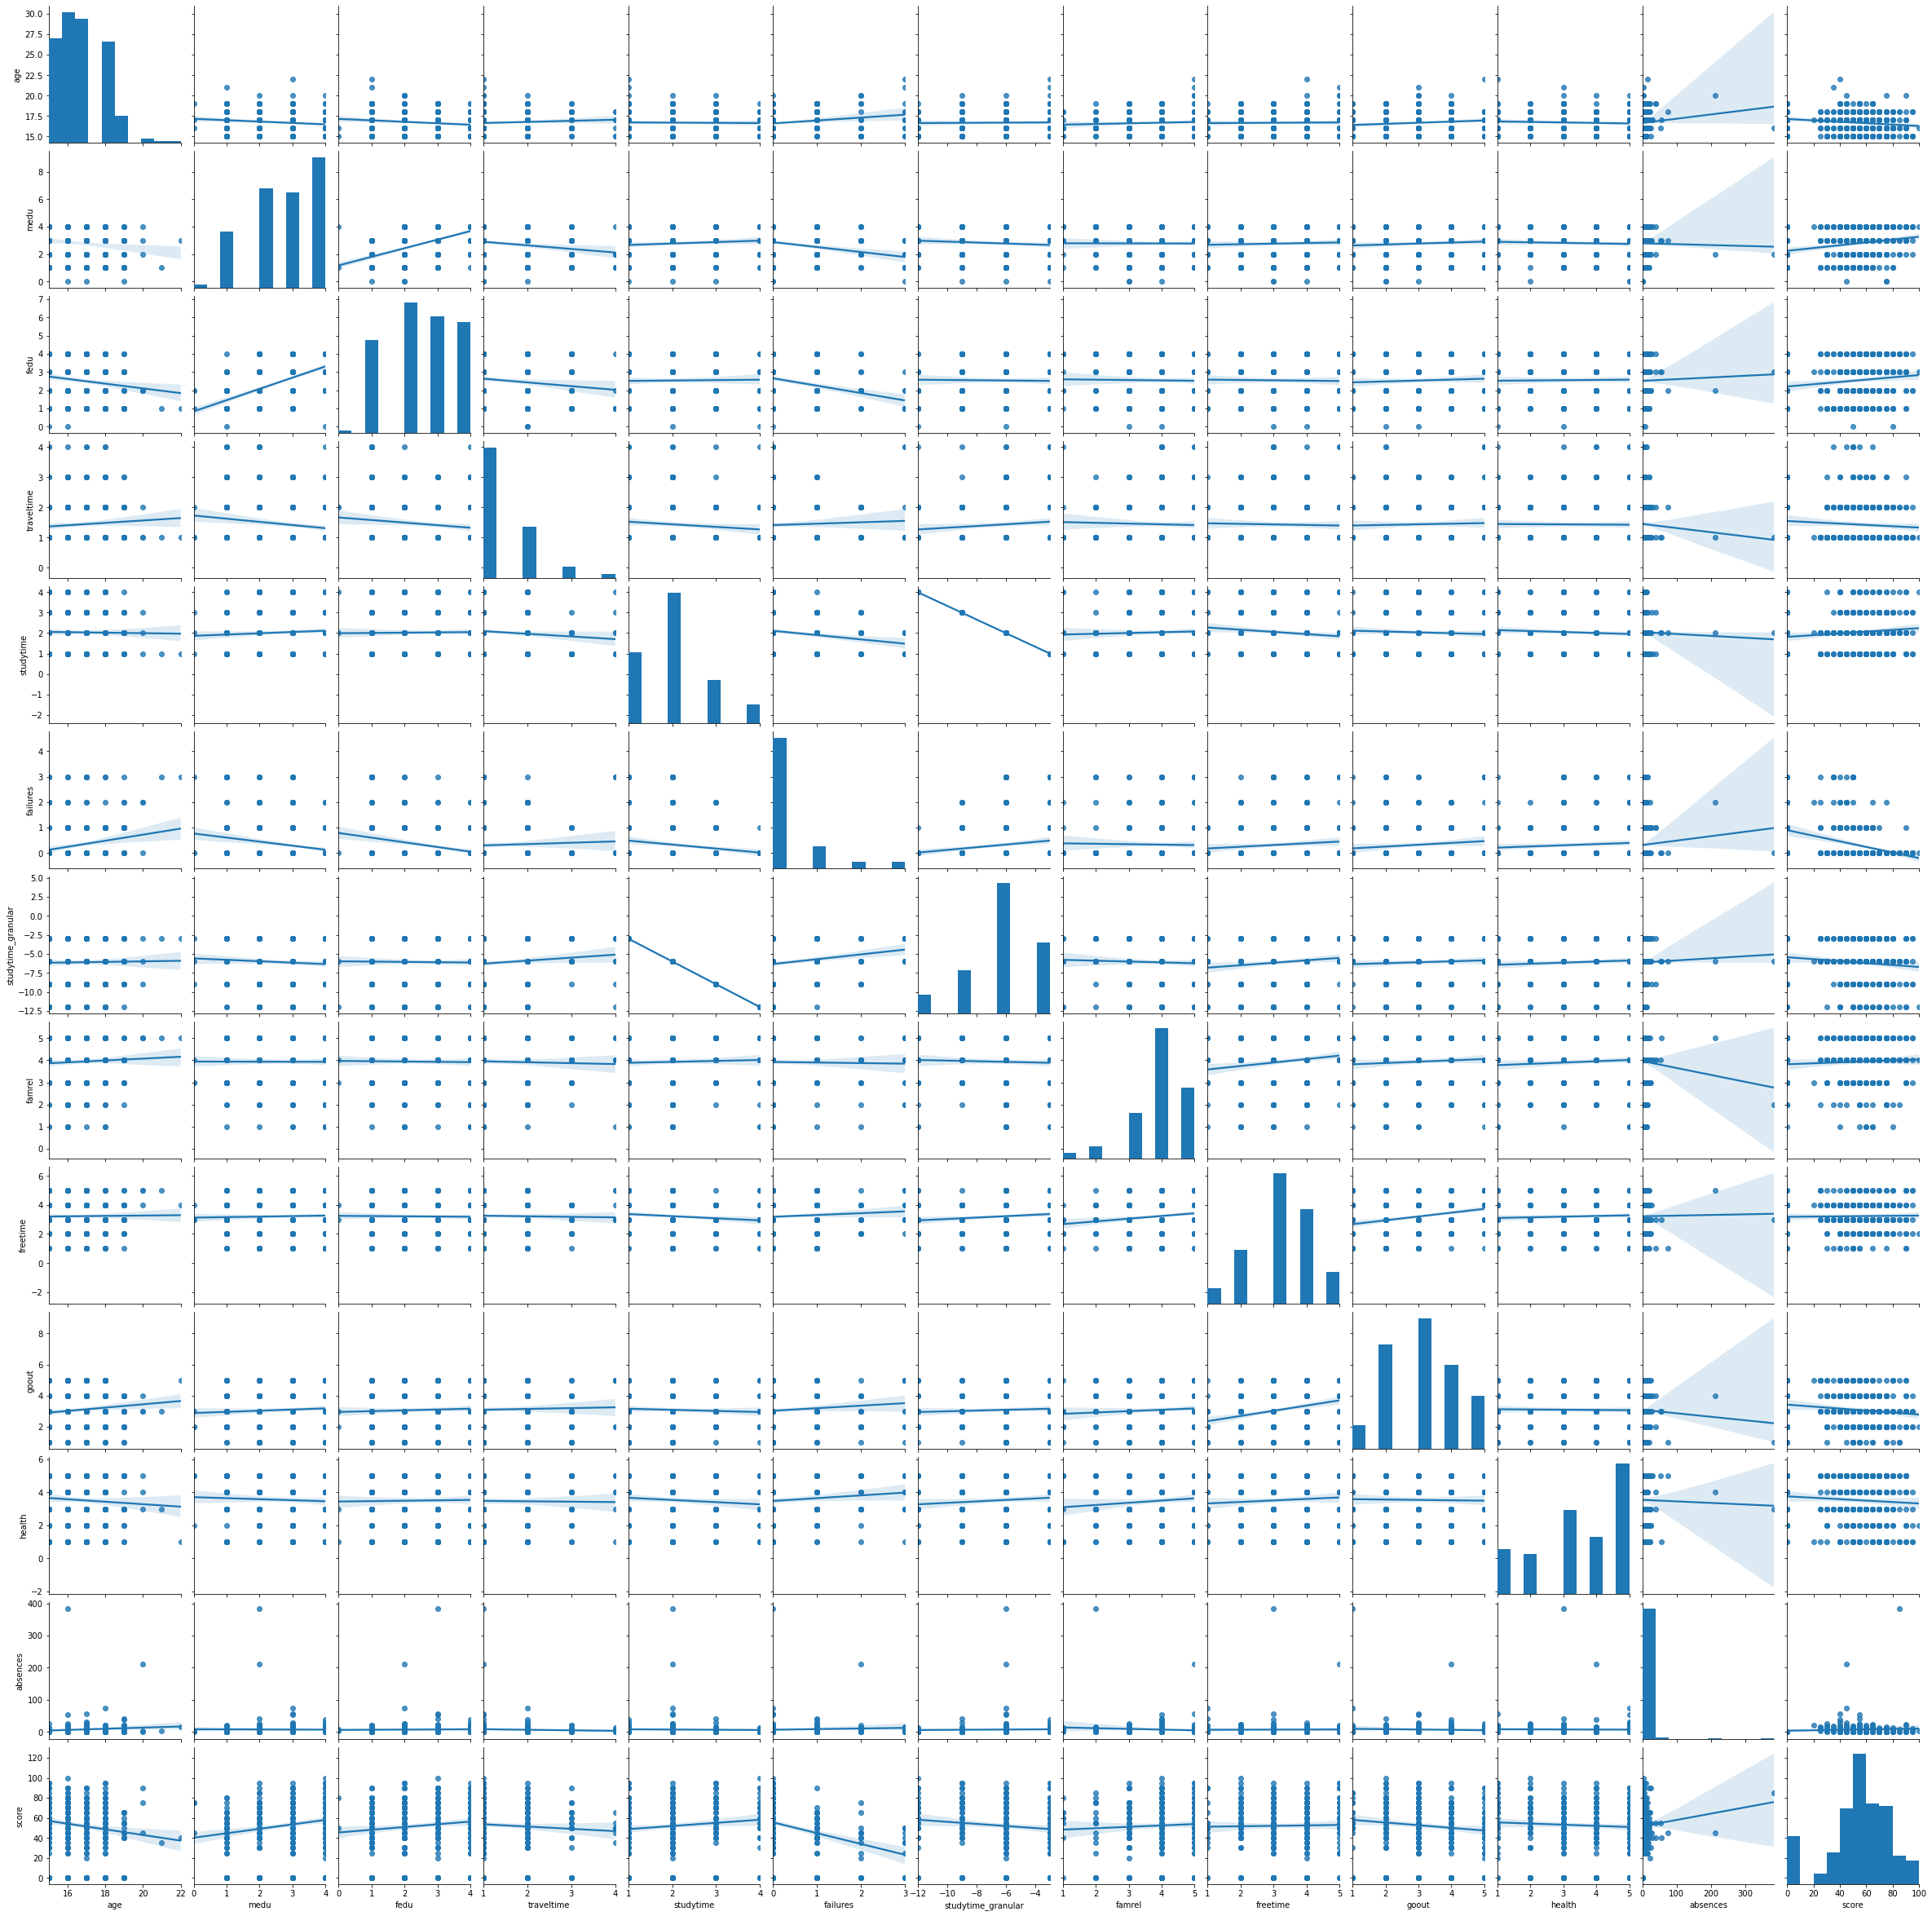

In [203]:
sns.pairplot(students, kind = 'reg')

In [204]:
students.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.146736,-0.152148,0.073146,-0.018227,0.205919,0.018227,0.058768,0.016099,0.121115,-0.068103,0.096628,-0.155726
medu,-0.146736,1.000000,0.621981,-0.165838,0.081032,-0.240319,-0.081032,-0.003697,0.038265,0.072320,-0.048331,-0.014047,0.213349
fedu,-0.152148,0.621981,1.000000,-0.132036,0.017306,-0.273286,-0.017306,-0.016791,-0.017263,0.050997,0.018624,0.020970,0.130923
traveltime,0.073146,-0.165838,-0.132036,1.000000,-0.105910,0.049738,0.105910,-0.032413,-0.026299,0.032629,-0.011724,-0.048242,-0.070559
studytime,-0.018227,0.081032,0.017306,-0.105910,1.000000,-0.181947,-1.000000,0.039899,-0.125066,-0.053831,-0.079180,-0.025707,0.115741
failures,0.205919,-0.240319,-0.273286,0.049738,-0.181947,1.000000,0.181947,-0.021068,0.091608,0.107747,0.088013,0.058166,-0.344338
studytime_granular,0.018227,-0.081032,-0.017306,0.105910,-1.000000,0.181947,1.000000,-0.039899,0.125066,0.053831,0.079180,0.025707,-0.115741
famrel,0.058768,-0.003697,-0.016791,-0.032413,0.039899,-0.021068,-0.039899,1.000000,0.171165,0.072291,0.089074,-0.082959,0.055305
freetime,0.016099,0.038265,-0.017263,-0.026299,-0.125066,0.091608,0.125066,0.171165,1.000000,0.296338,0.064315,0.010745,0.019026
goout,0.121115,0.072320,0.050997,0.032629,-0.053831,0.107747,0.053831,0.072291,0.296338,1.000000,-0.018026,-0.047954,-0.129685


Какие выводы мы можем сделать исходя из матрицы корреляции:
1) Отрицательная корреляция score и столбца age говорит нам о том, что чем старше ученик, тем ниже его оценка за экзамен.
2) То же можно сказать и относительно traveltime и failures: чем больше ученик добирается до учебного заведения(чем больше неудач), тем ниже оценка за итоговый экзамен.
3) Наличие свободного времени практически не влияет на оценку(что удивляет...)То же относительно studytime.
4) Заметим, что колонки studytime и studytime_granular являются полными обратными коррелятами, поэтому можем удалить одну из колонок.
5) Больше ничего удалять не будем, так как каждое условие в какой-либо степени влияет на оценку.

In [205]:
students.drop(['studytime_granular'], axis = 'columns', inplace = True)


# Поработаем с номинативными переменными

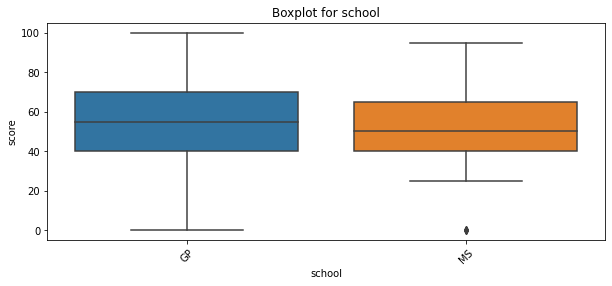

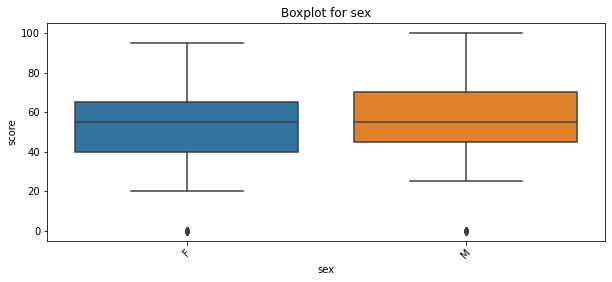

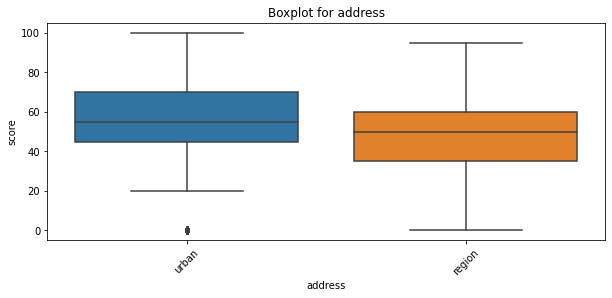

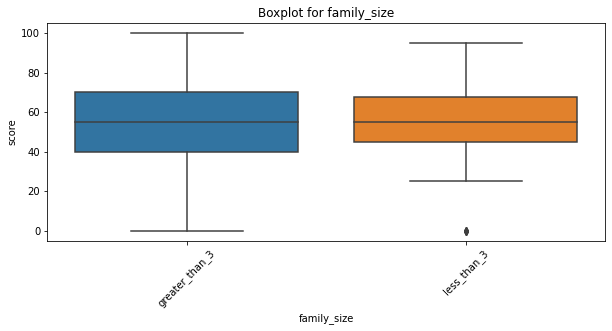

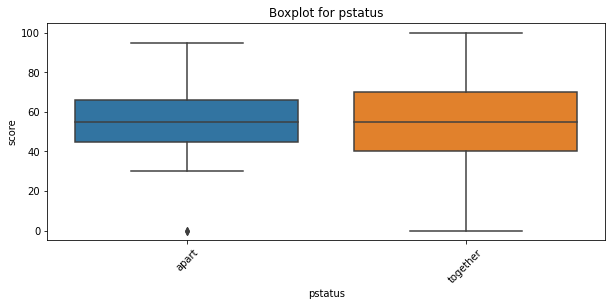

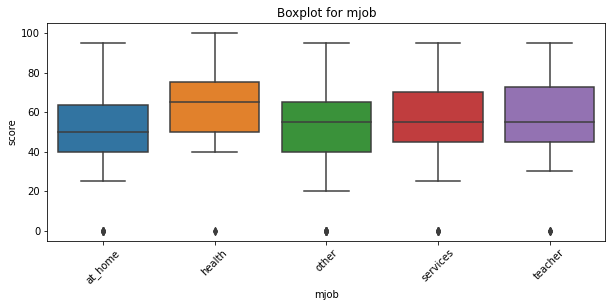

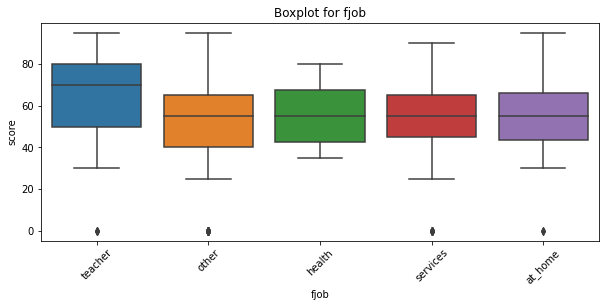

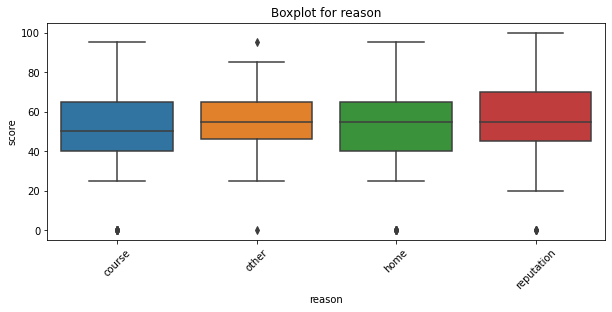

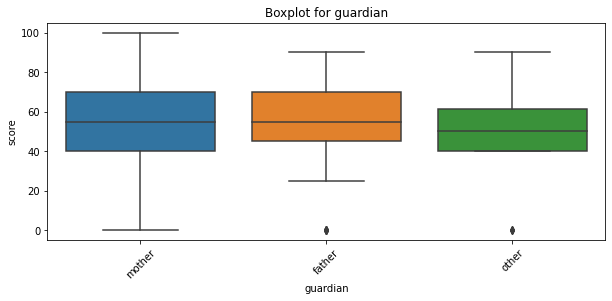

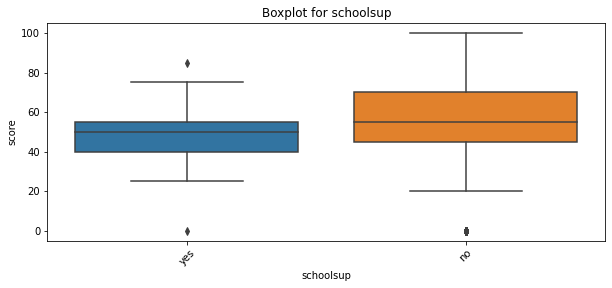

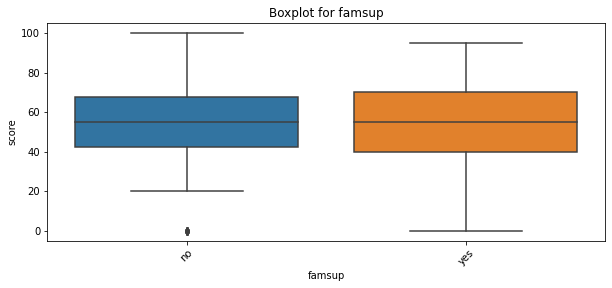

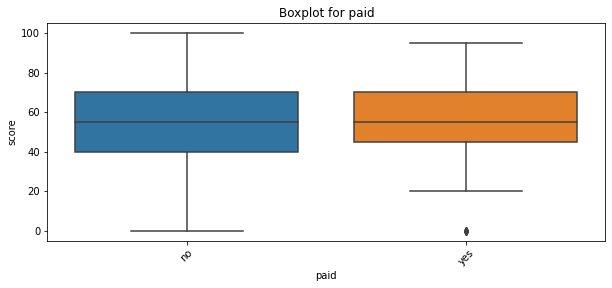

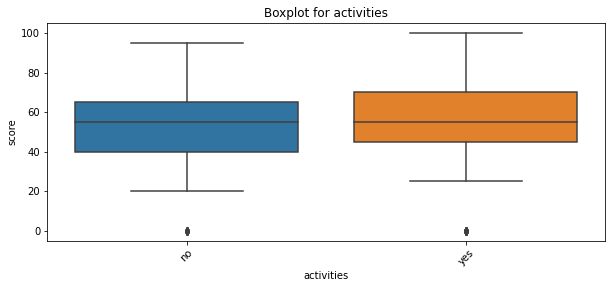

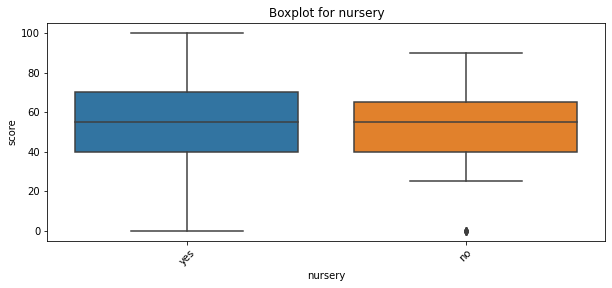

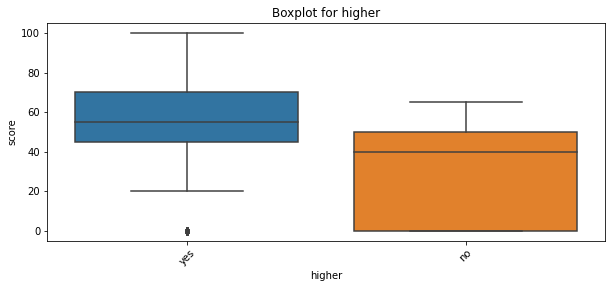

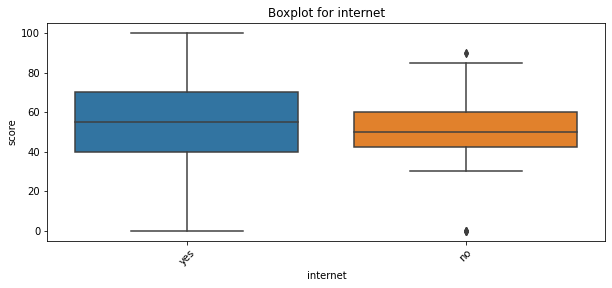

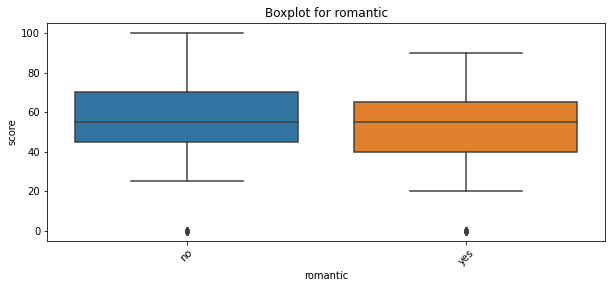

In [206]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y='score', 
                data=students)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in ['school', 'sex', 'address', 'family_size', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Из боксплотов следует:
1) Выбор школы не сильно влияет на оценку.
2) У учеников-мальчиков оценки за экзамен незначительно выше, чем у девочек.
3) Ребята, проживающие в городе, более успешны в сдаче экзамена.
4) Размер семьи не влияет на оценку.
5) Семейный статус также не сильно важен.
6) На итоговую оценку влияет работа матери. Выше оценка, если мама работает в сфере здравоохранения.
7) Работа отца не особо влияет, за исключением случая, когда отец работает педагогом.
8) Причина выбора школы практически не влияет на наш score.
9) Можно увидеть, что отсуствие родителей в качестве опекунов влияет отрицательно на среднюю оценку.
10) Увеличивает шансы на хорошую оценку доп. школьная поодержка.
11) Поддержка семьи особо не играет роли.
12) Если есть доп. платные занятия, то меньше шансов получить плохую оценку. Но на увеличение балла особо не влияет.
13) Чем больше внеучебных занятий, тем выше оценка за экзамен.
14) Наличие опыта в детском саду незначительно влияет на балл по экзамену.
15) Желание получить высшее образование ОЧЕНЬ СИЛЬНО влияет на оценку за экзамен.
16) Наличие интернета также дает большую вероятность получения хорошей оценки.
17) Наконец, у тех, кто связан романтическими отношениями, оценка за экзамен, как правило, ниже.

# Применим тест Стьюдента

### Для номинативных столбцов

In [207]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:20]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
    

In [208]:
for col in ['school', 'sex', 'address', 'family_size', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


### Для числовых столбцов

In [209]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:20]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [211]:
for col in ['age', 'medu', 'fedu','traveltime', 'studytime', 'failures', 'famrel',
                    'freetime', 'goout', 'health', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки absences


## Итак, проанализировав графики и статистические данные, мы пришли к выводу, что наиболее влияют на итоговую оценку экзамена следующие показатели:
1) Sex
2) address
3) mjob
4) higher
5) romantic
7) medu
8) failures
9) absences

 ### Оставим их в нашем датасете для успешного построения предсказательной модели:

In [212]:
students_for_model = students[['sex', 'address', 'mjob', 'higher', 'romantic', 'medu', 'failures', 'absences','score']]
students_for_model.head()

,sex,address,mjob,higher,romantic,medu,failures,absences,score
0,F,urban,at_home,yes,no,4.0,0.0,6.0,30.0
1,F,urban,at_home,yes,no,1.0,0.0,4.0,30.0
2,F,urban,at_home,yes,NaN,1.0,3.0,10.0,50.0
3,F,urban,health,yes,yes,4.0,0.0,2.0,75.0
4,F,urban,other,yes,no,3.0,0.0,4.0,50.0
